In [18]:
import pandas as pd

# Apri il file CSV in un nuovo foglio di lavoro
df = pd.read_csv('GBM.csv')

# Crea la colonna della differenza tra valore predetto e valore reale
df['Differenza'] = df['Valore Predetto'] - df['Valore Reale']

# Salva il nuovo foglio di lavoro in un file CSV
df.to_csv('GBMD.csv', index=False)



In [19]:
print(df)

                    club_name   age            player_name  \
0               Spezia Calcio  21.0              Emil Holm   
1                  SSC Napoli  23.0    Leonardo Candellone   
2         Real Betis Balompié  34.0                Joaquín   
3              Southampton FC  23.0            Oriol Romeu   
4                     AS Roma  33.0           Rui Patrício   
...                       ...   ...                    ...   
1398  Wolverhampton Wanderers  20.0        Yerson Mosquera   
1399      Olympique Marseille  29.0           Luiz Gustavo   
1400        Tottenham Hotspur  19.0         Destiny Udogie   
1401            VfL Wolfsburg  18.0          Aster Vranckx   
1402       Ural Yekaterinburg  23.0  Ramazan Gadzhimuradov   

                position club_involved_name  season  Valore Reale  \
0             Right-Back        SönderjyskE       9          0.30   
1         Centre-Forward             Torino       8          0.50   
2           Right Winger         Fiorentina     

In [20]:
# Calcola la media della differenza per ogni stagione
average_difference = df.groupby('season')['Differenza'].mean()

# Visualizza la media della differenza per ogni stagione
print(average_difference)

season
0     0.966704
1     0.606339
2     0.343707
3    -0.613660
4     0.530153
5    -1.433657
6    -1.187130
7    -0.774538
8    -0.844940
9    -0.666589
10    0.117116
Name: Differenza, dtype: float64


In [21]:
# Calcola la media della differenza per ogni stagione
average_difference2 = df.groupby('position')['Differenza'].mean()

# Visualizza la media della differenza per ogni stagione
print(average_difference2)

position
Attacking Midfield   -1.422011
Central Midfield     -0.206010
Centre-Back           0.328338
Centre-Forward       -1.424548
Defensive Midfield    0.008178
Goalkeeper            0.562771
Left Midfield         2.564883
Left Winger          -1.624719
Left-Back             0.741328
Right Midfield        0.157999
Right Winger         -0.324926
Right-Back            1.496113
Second Striker       -4.912012
attack                2.218348
midfield              4.345589
Name: Differenza, dtype: float64


In [22]:
# Calcola la media della differenza per ogni posizione in ogni stagione
seasxpositerror = df.groupby(['season', 'position'])['Differenza'].mean()

# Visualizza la media della differenza per ogni posizione in ogni stagione
print(seasxpositerror)

# Salva il nuovo foglio di lavoro in un file CSV
seasxpositerror.to_csv('seasxpositerror.csv', index=False)

season  position          
0       Attacking Midfield    -1.444587
        Central Midfield      -0.108205
        Centre-Back            1.760555
        Centre-Forward         1.051049
        Defensive Midfield    -1.122018
                                ...    
10      Left-Back             -0.509707
        Right Midfield         3.749041
        Right Winger           1.331324
        Right-Back             5.474313
        Second Striker       -15.532352
Name: Differenza, Length: 137, dtype: float64


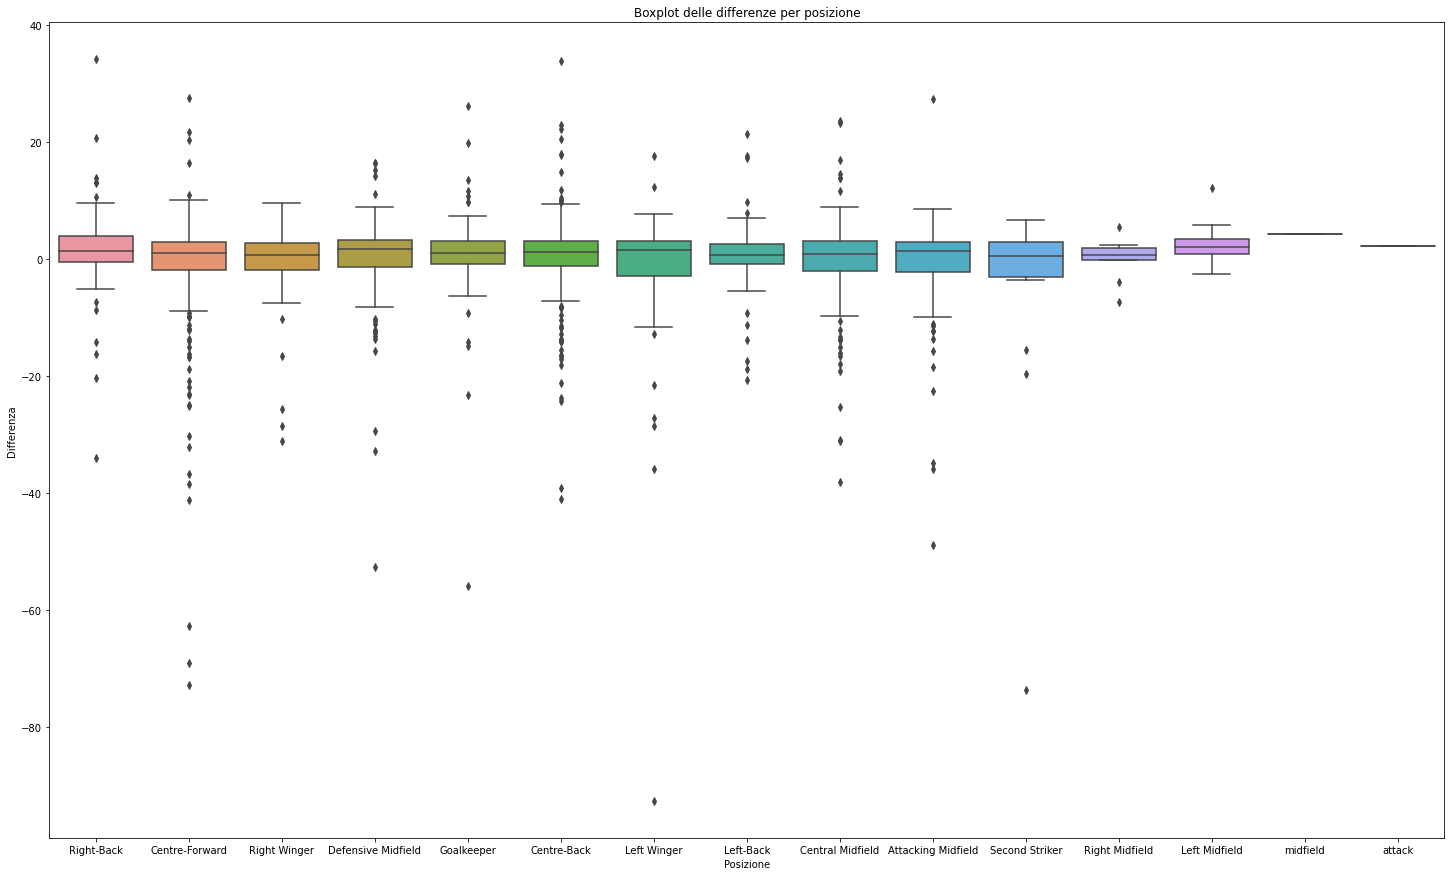

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apri il dataframe contenente le differenze
df = pd.read_csv('GBMD.csv')

# Crea il boxplot delle differenze
plt.figure(figsize=(25, 15))
sns.boxplot(x='position', y='Differenza', data=df)
plt.xlabel('Posizione')
plt.ylabel('Differenza')
plt.title('Boxplot delle differenze per posizione')
plt.show()


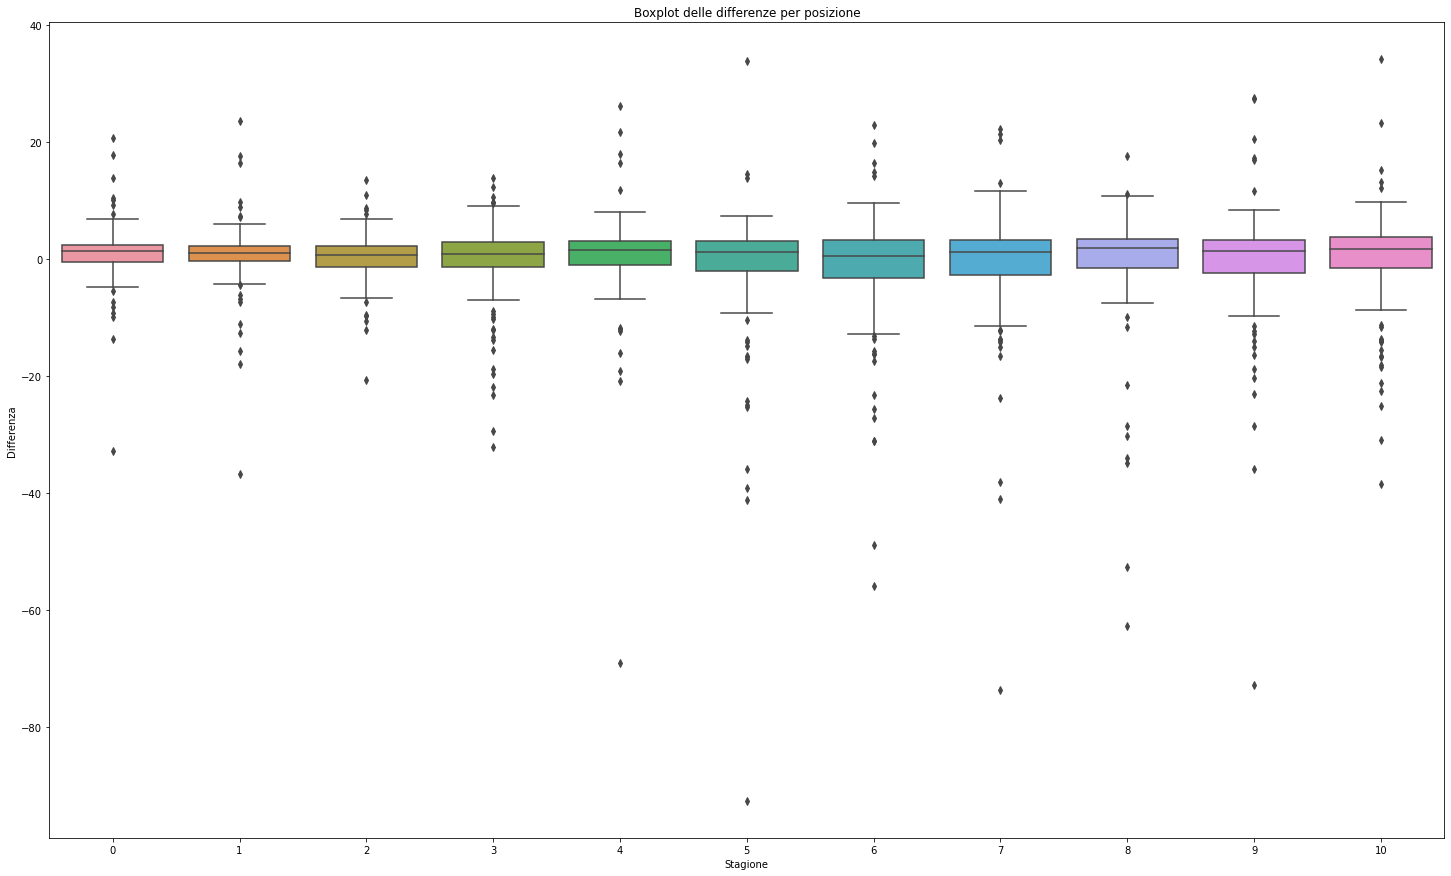

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apri il dataframe contenente le differenze
df = pd.read_csv('GBMD.csv')

# Crea il boxplot delle differenze
plt.figure(figsize=(25, 15))
sns.boxplot(x='season', y='Differenza', data=df)
plt.xlabel('Stagione')
plt.ylabel('Differenza')
plt.title('Boxplot delle differenze per posizione')
plt.show()

In [25]:
# Ordina il dataframe in base alla colonna 'Differenza' in ordine ascendente
sorted_df = df.sort_values('Differenza')

# Seleziona i primi 10 valori con la differenza più vicina allo 0
top_10_values = sorted_df.head(20)

# Stampa i 10 valori
print(top_10_values)


                 club_name   age        player_name            position  \
1125          FC Barcelona  25.0  Philippe Coutinho         Left Winger   
797           FC Barcelona  28.0  Antoine Griezmann      Second Striker   
764             Chelsea FC  28.0      Romelu Lukaku      Centre-Forward   
1199           Juventus FC  28.0    Gonzalo Higuaín      Centre-Forward   
478             SSC Napoli  21.0     Victor Osimhen      Centre-Forward   
394             Chelsea FC  23.0  Kepa Arrizabalaga          Goalkeeper   
1044           Juventus FC  24.0             Arthur  Defensive Midfield   
1183    Atlético de Madrid  22.0       Thomas Lemar  Attacking Midfield   
178      Manchester United  24.0      Romelu Lukaku      Centre-Forward   
972      Manchester United  26.0      Harry Maguire         Centre-Back   
1043       Manchester City  23.0    Aymeric Laporte         Centre-Back   
562           Liverpool FC  23.0       Darwin Núñez      Centre-Forward   
751           FC Barcelon

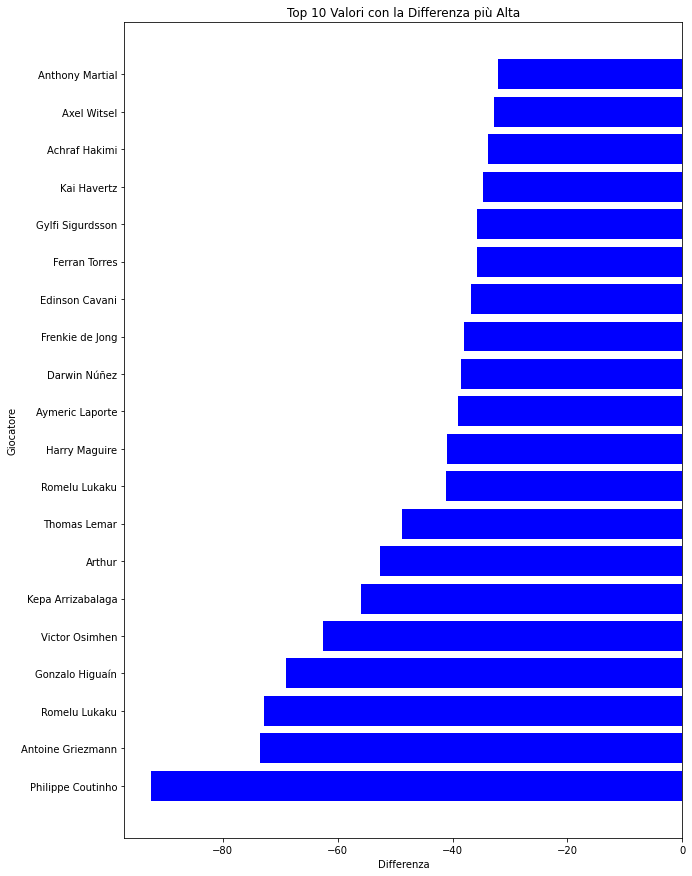

In [31]:
import matplotlib.pyplot as plt

# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza')

# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Crea il grafico a barre orizzontali
plt.figure(figsize=(10, 15))
plt.barh(range(len(top_10_values)), top_10_values['Differenza'], color='blue')
plt.yticks(range(len(top_10_values)), top_10_values['player_name'])
plt.xlabel('Differenza')
plt.ylabel('Giocatore')
plt.title('Top 10 Valori con la Differenza più Alta')

# Mostra il grafico
plt.show()


In [26]:
# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza', ascending=False)

# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Stampa i 10 valori
print(top_10_values)


                club_name   age           player_name            position  \
398   Paris Saint-Germain  24.0         Nordi Mukiele          Right-Back   
960            Chelsea FC  16.0          Ethan Ampadu         Centre-Back   
490     Manchester United  36.0     Cristiano Ronaldo      Centre-Forward   
637           Juventus FC  19.0     Mohamed Ihattaren  Attacking Midfield   
82           FC Barcelona  27.0      Jasper Cillessen          Goalkeeper   
757          Liverpool FC  20.0          Luis Alberto    Central Midfield   
270   Paris Saint-Germain  24.0        Renato Sanches    Central Midfield   
231          FC Barcelona  19.0     Jean-Clair Todibo         Centre-Back   
1351  Paris Saint-Germain  23.0          Abdou Diallo         Centre-Back   
992           Real Madrid  23.0         Álvaro Morata      Centre-Forward   
1148          Juventus FC  20.0       Luca Pellegrini           Left-Back   
9     Paris Saint-Germain  24.0  Gregory van der Wiel          Right-Back   

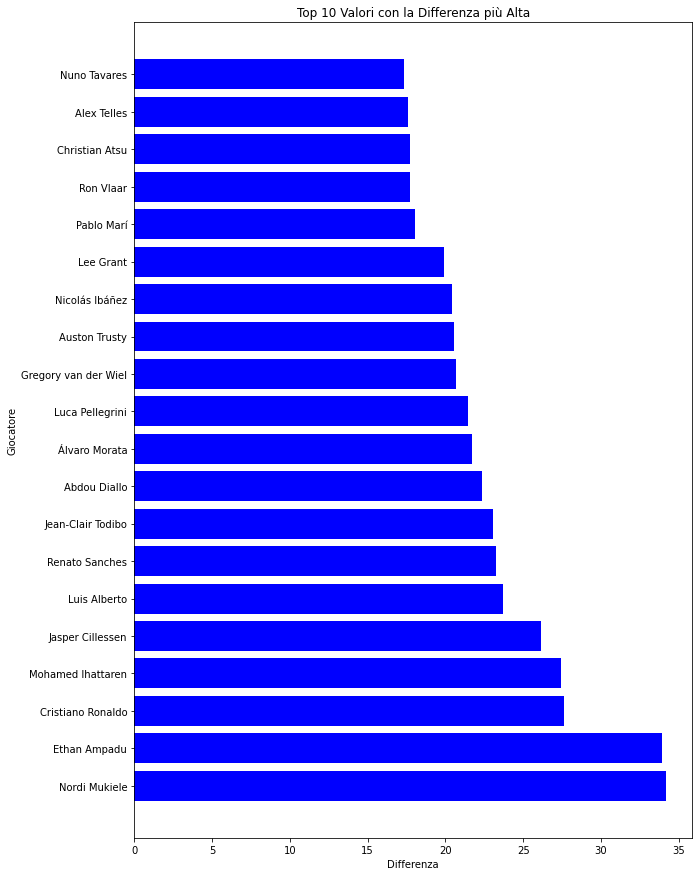

In [32]:
import matplotlib.pyplot as plt

# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza', ascending=False)

# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Crea il grafico a barre orizzontali
plt.figure(figsize=(10, 15))
plt.barh(range(len(top_10_values)), top_10_values['Differenza'], color='blue')
plt.yticks(range(len(top_10_values)), top_10_values['player_name'])
plt.xlabel('Differenza')
plt.ylabel('Giocatore')
plt.title('Top 10 Valori con la Differenza più Alta')

# Mostra il grafico
plt.show()



season
2012/2013    1.877712
2013/2014    0.981096
2014/2015    0.276581
2015/2016    0.052945
2016/2017    0.187927
2017/2018   -2.363742
2018/2019   -1.845853
2019/2020   -1.188001
2020/2021   -1.485041
2021/2022   -1.170063
2022/2023   -0.780912
Name: Differenza, dtype: float64
position
Attacking Midfield   -1.386943
Central Midfield     -0.723400
Centre-Back           0.118503
Centre-Forward       -1.075220
Defensive Midfield   -0.416638
Goalkeeper           -0.469700
Left Midfield         2.330176
Left Winger          -2.144216
Left-Back             0.417270
Right Midfield       -0.543836
Right Winger         -0.952358
Right-Back            1.349141
Second Striker       -4.903280
attack                0.444497
midfield              0.432668
Name: Differenza, dtype: float64
season     position          
2012/2013  Attacking Midfield   -0.212936
           Central Midfield      1.129484
           Centre-Back           2.417508
           Centre-Forward        2.539226
           De

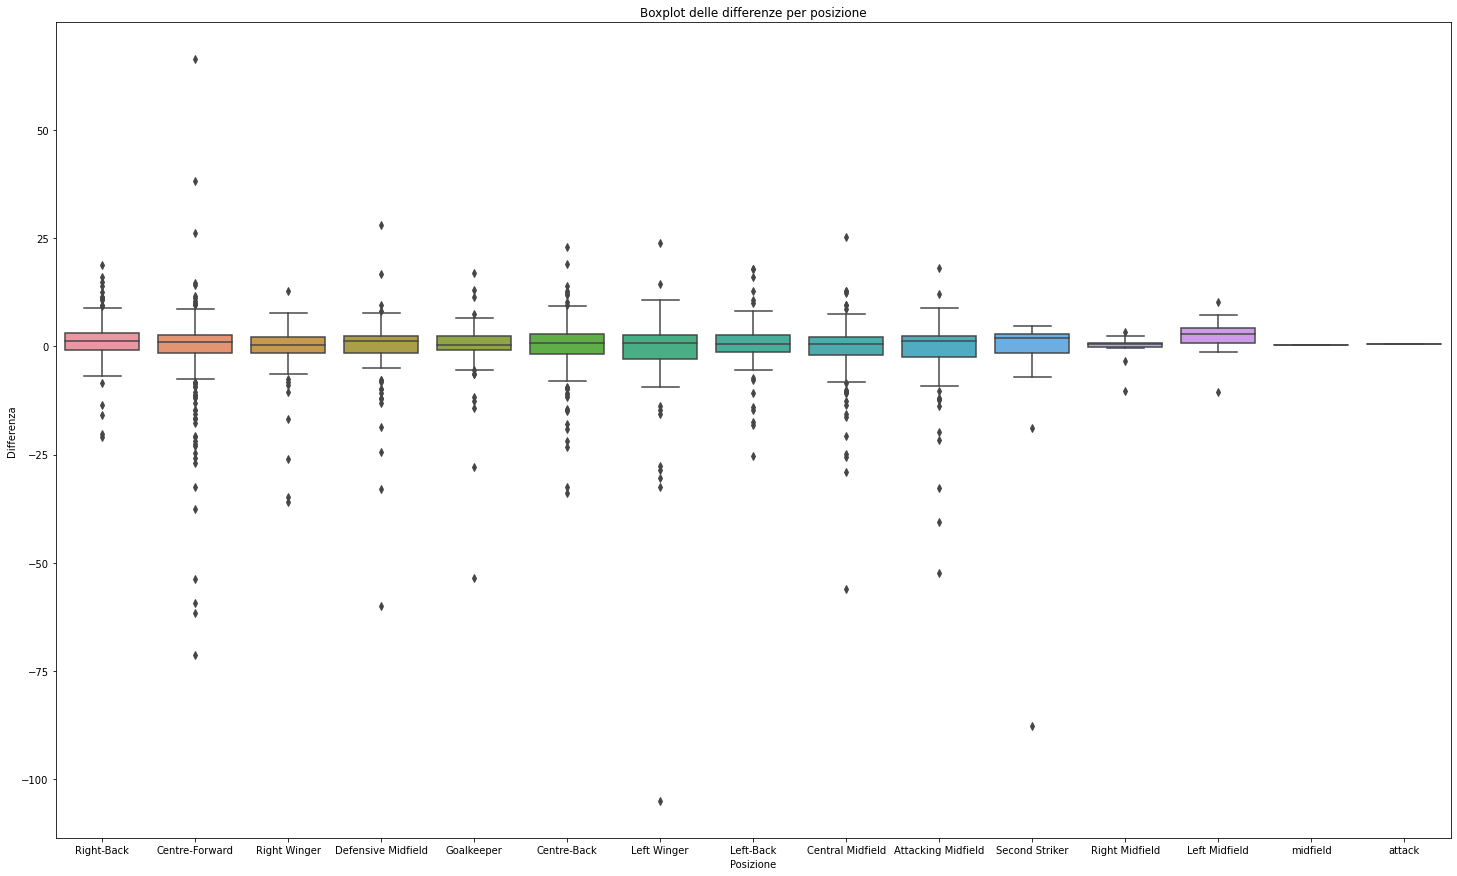

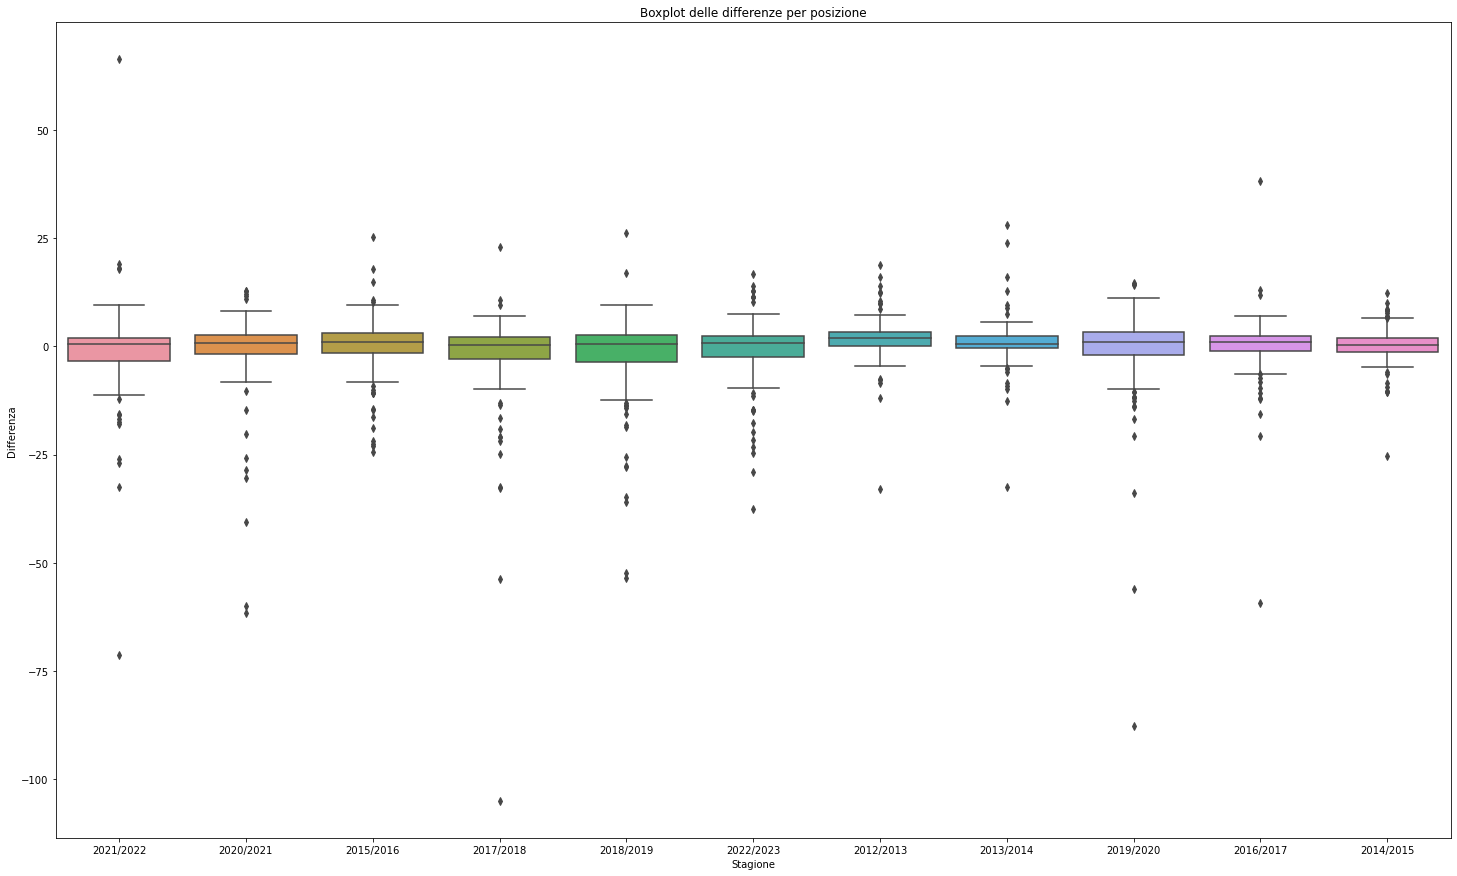

       age  Valore Reale  Valore Predetto             club_name  \
1125  25.0         135.0        29.996494          FC Barcelona   
797   28.0         120.0        32.245995          FC Barcelona   
764   28.0         113.0        41.705770            Chelsea FC   
478   21.0          75.0        13.481651            SSC Napoli   
1044  24.0          76.0        16.027878           Juventus FC   
1199  28.0          90.0        30.753582           Juventus FC   
751   22.0          86.0        29.942130          FC Barcelona   
178   24.0          84.7        31.023878     Manchester United   
394   23.0          80.0        26.381000            Chelsea FC   
1183  22.0          72.0        19.743729    Atlético de Madrid   
1190  21.0          80.0        39.420353            Chelsea FC   
562   23.0          75.0        37.456430          Liverpool FC   
284   27.0          67.8        31.754622       Manchester City   
117   20.0          64.0        29.187666            Chelsea F

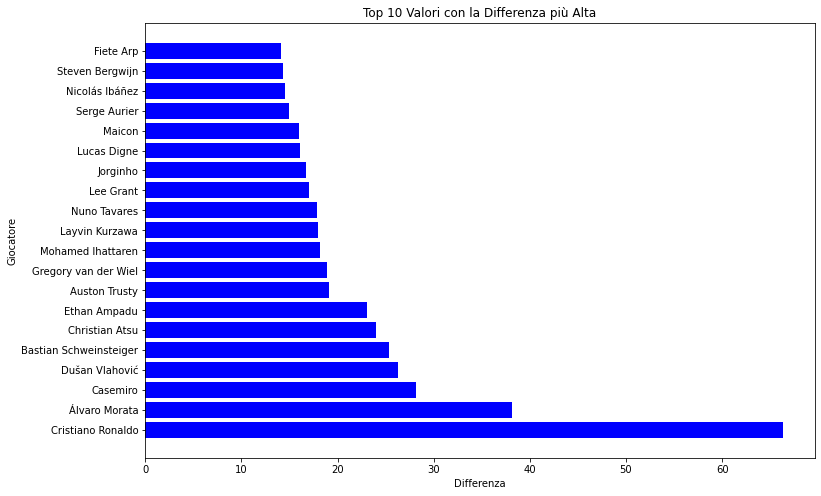

       age  Valore Reale  Valore Predetto            club_name  \
490   36.0         15.00        81.315500    Manchester United   
992   23.0         30.00        68.142510          Real Madrid   
835   21.0          6.00        34.126690          Real Madrid   
390   18.0          3.20        29.512333       ACF Fiorentina   
1348  30.0          9.00        34.360153    Manchester United   
1013  21.0          3.00        26.954676           Chelsea FC   
960   16.0          2.80        25.842380           Chelsea FC   
375   23.0          1.82        20.941008           Arsenal FC   
9     24.0          6.00        24.892189  Paris Saint-Germain   
637   19.0          1.90        20.052546          Juventus FC   
304   22.0         25.00        42.933247  Paris Saint-Germain   
46    21.0          8.00        25.873117           Arsenal FC   
210   35.0          1.70        18.709532    Manchester United   
920   31.0         11.30        28.068249           Arsenal FC   
1093  19.0

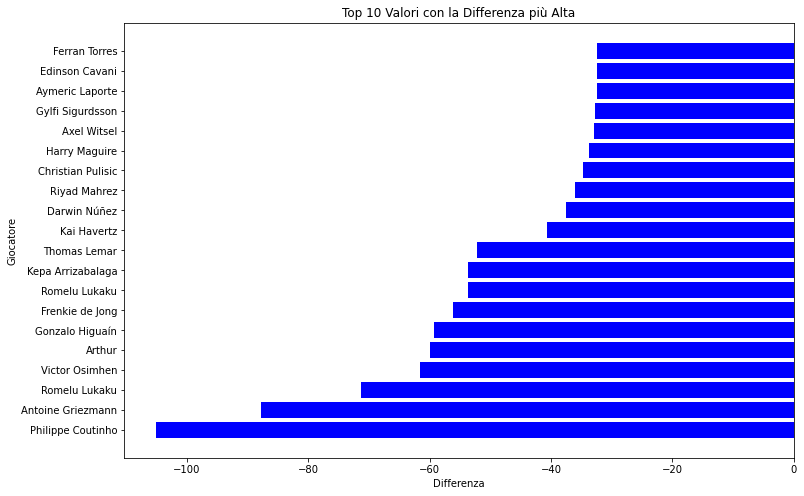

In [33]:
import pandas as pd

# Apri il file CSV in un nuovo foglio di lavoro
df = pd.read_csv('XGB0.csv')

# Crea la colonna della differenza tra valore predetto e valore reale
df['Differenza'] = df['Valore Predetto'] - df['Valore Reale']

# Salva il nuovo foglio di lavoro in un file CSV
df.to_csv('XGBD.csv', index=False)

# Calcola la media della differenza per ogni stagione
average_difference = df.groupby('season')['Differenza'].mean()

# Visualizza la media della differenza per ogni stagione
print(average_difference)

# Calcola la media della differenza per ogni stagione
average_difference2 = df.groupby('position')['Differenza'].mean()

# Visualizza la media della differenza per ogni stagione
print(average_difference2)

# Calcola la media della differenza per ogni posizione in ogni stagione
seasxpositerror = df.groupby(['season', 'position'])['Differenza'].mean()

# Visualizza la media della differenza per ogni posizione in ogni stagione
print(seasxpositerror)

# Salva il nuovo foglio di lavoro in un file CSV
seasxpositerror.to_csv('seasxpositerror2.csv', index=False)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apri il dataframe contenente le differenze
df = pd.read_csv('XGBD.csv')

# Crea il boxplot delle differenze
plt.figure(figsize=(25, 15))
sns.boxplot(x='position', y='Differenza', data=df)
plt.xlabel('Posizione')
plt.ylabel('Differenza')
plt.title('Boxplot delle differenze per posizione')
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apri il dataframe contenente le differenze
df = pd.read_csv('XGBD.csv')

# Crea il boxplot delle differenze
plt.figure(figsize=(25, 15))
sns.boxplot(x='season', y='Differenza', data=df)
plt.xlabel('Stagione')
plt.ylabel('Differenza')
plt.title('Boxplot delle differenze per posizione')
plt.show()

# Ordina il dataframe in base alla colonna 'Differenza' in ordine ascendente
sorted_df = df.sort_values('Differenza')

# Seleziona i primi 10 valori con la differenza più vicina allo 0
top_10_values = sorted_df.head(20)

# Stampa i 10 valori
print(top_10_values)

# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza', ascending=False)
import matplotlib.pyplot as plt

# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza', ascending=False)

# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Crea il grafico a barre orizzontali
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_values)), top_10_values['Differenza'], color='blue')
plt.yticks(range(len(top_10_values)), top_10_values['player_name'])
plt.xlabel('Differenza')
plt.ylabel('Giocatore')
plt.title('Top 10 Valori con la Differenza più Alta')

# Mostra il grafico
plt.show()
# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Stampa i 10 valori
print(top_10_values)

import matplotlib.pyplot as plt

# Ordina il dataframe in base alla colonna 'Differenza' in ordine discendente
sorted_df = df.sort_values('Differenza')

# Seleziona i primi 10 valori con la differenza più alta
top_10_values = sorted_df.head(20)

# Crea il grafico a barre orizzontali
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_values)), top_10_values['Differenza'], color='blue')
plt.yticks(range(len(top_10_values)), top_10_values['player_name'])
plt.xlabel('Differenza')
plt.ylabel('Giocatore')
plt.title('Top 10 Valori con la Differenza più Alta')

# Mostra il grafico
plt.show()

NameError: name 'results' is not defined